In [7]:
% matplotlib inline

import datetime
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

import expenses.transactions
import utils.excel_sheet as excel_sheet
import utils.google_sheet as google_sheet

days = 120
starting_balance = 6358.48
load_from = "google"

print('Current directory: {}'.format(os.getcwd()))

home = str(Path.home())
print('Home path: {}'.format(home))

transactions_file = '{}/Documents/Personal/Budget/transactions.xlsx'.format(home)
google_api_key_file = '{}/Documents/Personal/Budget/tools/cashflow/cashflow-e30812754233.json'.format(home)

if not os.path.isfile(google_api_key_file):
    raise RuntimeError('File "{}" does not exist.'.format(google_api_key_file))

start_date = datetime.datetime.now()
end_date = start_date + datetime.timedelta(days=days)

raw_transactions_df = None
if load_from == "excel":
    # Load the raw transactions from an Excel sheet
    raw_transactions_df = excel_sheet.excel_load_transactions(transactions_file, debug=True)
elif load_from == "google":
    # Load the raw transactions from a Google sheet
    raw_transactions_df = google_sheet.gspread_load_transactions(
        google_api_file_pathname=google_api_key_file,
        debug=True)
else:
    raise RuntimeError('Unsupported load origin "{}".'.format(load_from))

# Process and load the transactions in the cash flow data frame
tx_df = expenses.transactions.load_transactions(raw_transactions_df, starting_balance=6119.30, days=days)

# Display the data frame
tx_df


Current directory: /Users/brigaldies/Documents/Personal/Budget/tools/cashflow
Home path: /Users/brigaldies
Retrieve Google API credentials...
Authorizing with Google API credentials...


Reading all records from Google spreadsheet transactions...


Loading records into a data frame...
29 records read.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 8 columns):
item              29 non-null object
enabled           29 non-null object
item_type         29 non-null object
schedule_label    29 non-null object
schedule_type     29 non-null object
schedule_start    29 non-null object
schedule_expr     29 non-null object
amount            29 non-null float64
dtypes: float64(1), object(7)
memory usage: 2.0+ KB
None
Transactions count: 29
Starting balance  : 6119.3
Days in the future: 120
Date interval     : From 2018-09-23 16:05:40.418149 to 2019-01-21 16:05:40.418149


Row item              Red Pump Kitchen downpayment
enabled                                      0
item_type                                debit
schedule_label                     One payment
schedule_type                         one_time
schedule_start                      2018-09-21
schedule_expr                                 
amount                                    1389
Name: 20, dtype: object disabled.
Row item              Farm Bureau Umbrella annual fee
enabled                                         0
item_type                                   debit
schedule_label                        One payment
schedule_type                            one_time
schedule_start                         2018-09-21
schedule_expr                                    
amount                                        325
Name: 21, dtype: object disabled.
Row item              (OSC) Flights (Atlanta, Montreal)
enabled                                           0
item_type                               

,date_ts,item,item_type,amount,balance
date,,,,,
2018-09-24,1.537762e+09,Chase VISA downpayment,debit,2000.00,4119.3
2018-09-24,1.537762e+09,IRA Vanguard,debit,50.00,4069.3
2018-09-26,1.537934e+09,Jennifer’s ring,debit,126.00,3943.3
2018-09-26,1.537934e+09,Julien’s rent & groceries,debit,782.00,3161.3
2018-09-26,1.537934e+09,Lucie’s rent & groceries,debit,462.00,2699.3
2018-09-26,1.537934e+09,Prius,debit,269.51,2429.79
2018-09-26,1.537934e+09,Utility - Water,debit,90.00,2339.79
2018-09-26,1.537934e+09,eCL transfer,credit,500.00,2839.79
2018-09-27,1.538021e+09,Mortgage,debit,688.81,2150.98


Regression coefficients: [[-0.0001089]]


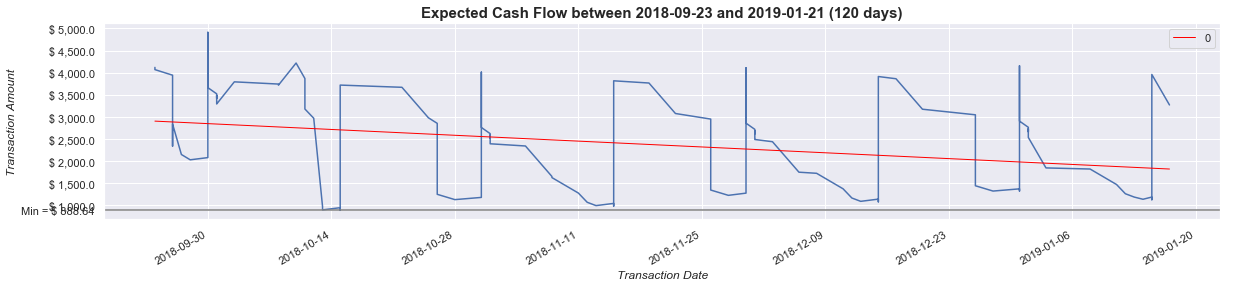

In [8]:
# Reset default params
sns.set()

# Set context
sns.set_context("notebook")

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(20, 4))

# Extract the time series to plot
ts = tx_df.loc[:, 'balance']

# Display a line chart over a time line
plt.plot(ts[:], '-')
_ = plt.xticks(rotation=45)

# Display the min balance with a horizontal line
min_balance = np.round(np.min(tx_df['balance']), 2)
plt.axhline(min_balance, color="gray")

# Add the min balance ticker
locs = list(ax.get_yticks())
locs += [min_balance]
ax.set_yticklabels(['$ {:,}'.format(loc) if loc != min_balance else 'Min = $ {:,}'.format(loc) for loc in locs])
ax.set_yticks(locs)

# Fit a linear regression line
lr = linear_model.LinearRegression()
lr.fit(X=tx_df.date_ts.values.reshape(-1, 1), y=tx_df['balance'].values.reshape(-1, 1))
prediction_df = pd.DataFrame(lr.predict(tx_df.date_ts.values.reshape(-1, 1)), index=tx_df.index)
print('Regression coefficients: {}'.format(lr.coef_))
if lr.coef_[0][0] < 0:
    reg_line_color = 'red'
else:
    reg_line_color = 'green'
prediction_df.plot(linestyle='-', color=reg_line_color, linewidth=1, ax=ax)

# Set plot title and axis labels
ax.set_title('Expected Cash Flow between {:%Y-%m-%d} and {:%Y-%m-%d} ({} days)'.format(start_date, end_date, days), fontweight='bold', fontsize=15)
ax.set_ylabel("Transaction Amount", fontsize=12, fontstyle='italic')
ax.set_xlabel("Transaction Date", fontsize=12, fontstyle='italic')

pass

In [9]:
# Take it to a Kibana visualization

# Pre-requisite: Load an Elasticsearch + Kibana environment by running docker compose from the command-line
# docker-compose up

import utils.search as search

# Connect to ES
es = search.connect()

# (Re-)create an Elastic index
search.create_index(es, "cashflow")
search.index_transactions(es, "cashflow", tx_df)


{
    "name": "9wmIaXE",
    "cluster_name": "docker-cluster",
    "cluster_uuid": "2aS2kVM9SlO9-QuuYR2_lA",
    "version": {
        "number": "6.4.1",
        "build_flavor": "default",
        "build_type": "tar",
        "build_hash": "e36acdb",
        "build_date": "2018-09-13T22:18:07.696808Z",
        "build_snapshot": false,
        "lucene_version": "7.4.0",
        "minimum_wire_compatibility_version": "5.6.0",
        "minimum_index_compatibility_version": "5.0.0"
    },
    "tagline": "You Know, for Search"
}
Deleting the index ...


Creating the index ...


Indexing: {'_index': 'cashflow', '_type': 'transaction', '_id': 0, '_source': {'date': Timestamp('2018-09-24 00:00:00'), 'item': 'Chase VISA downpayment', 'item_type': 'debit', 'amount': 2000.0, 'balance': 4119.3}}
Indexing: {'_index': 'cashflow', '_type': 'transaction', '_id': 1, '_source': {'date': Timestamp('2018-09-24 00:00:00'), 'item': 'IRA Vanguard', 'item_type': 'debit', 'amount': 50.0, 'balance': 4069.3}}
Indexing: {'_index': 'cashflow', '_type': 'transaction', '_id': 2, '_source': {'date': Timestamp('2018-09-26 00:00:00'), 'item': 'Jennifer’s ring', 'item_type': 'debit', 'amount': 126.0, 'balance': 3943.3}}
Indexing: {'_index': 'cashflow', '_type': 'transaction', '_id': 3, '_source': {'date': Timestamp('2018-09-26 00:00:00'), 'item': 'Julien’s rent & groceries', 'item_type': 'debit', 'amount': 782.0, 'balance': 3161.3}}
Indexing: {'_index': 'cashflow', '_type': 'transaction', '_id': 4, '_source': {'date': Timestamp('2018-09-26 00:00:00'), 'item': 'Lucie’s rent & groceries', '